# IMEC2001 Herramientas Computacionales 
## Semana 5: Sistemas de Ecuaciones
### Clase 10: Estática

Universidad de los Andes — Noviembre 8, 2023.

---

## TABLA DE CONTENIDO

### Sección 1: Estática [→](#section1)
- 1.1. Cargar Librerías
- 1.2. Momento Par o Torque
- 1.3. Equilibrio
- 1.4. Ejemplos Diagrama Cuerpo Libre
- 1.5. Condiciones de Equilibrio
- 1.6. Ejemplo 1
    - 1.6.1. Método de Matrices  
        - 1.6.1.1 Empleando `numpy.linalg.inv` y `numpy.dots`
        - 1.6.1.2 Empleando `numpy.linalg.solve`
        - 1.6.1.3 Empleando `sympy.rref()`
    - 1.6.2. Librería `scipy.optimize.fsolve`
    - 1.6.3. Librería `sympy.solve`
- 1.7. Ejemplo 2
    - 1.7.1. Método de Matrices  
        - 1.7.1.1 Empleando `numpy.linalg.inv` y `numpy.dots`
        - 1.7.1.2 Empleando `numpy.linalg.solve`
        - 1.7.1.3 Empleando `sympy.rref()`
    - 1.7.2. Librería `scipy.optimize.fsolve`
    - 1.7.3. Librería `sympy.solve`
- 1.8. Estructuras
    - 1.8.1. Ejemplo 3 (Librería `sympy.solve`)
___

<a id="section1"></a>
# Sección 1: Estática

## 1.1. Cargar Librerías

Primero, asegurémonos de haber instalado las librerías:

> ```python
  !pip install numpy
  !pip install scipy
  !pip install sympy
  ```

In [1]:
# Datos y Gráficas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Raíces
import numpy as np
from scipy import optimize
import sympy

In [2]:
def formato_grafica(titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    
    if leyenda == True:
        plt.legend(loc='best')
    
    plt.tight_layout;

## 1.2. Momento Par o Torque

Una fuerza puede hacer girar un cuerpo alrededor de un eje, siempre y cuando el eje sea cualquier línea que no corte ni sea paralela a la línea de acción de la fuerza.

Esta tendencia rotacional se conoce como el **momento par** $M$ o **torque** de la fuerza.

De forma explícita, se tiene que:

$$
M = F \: d \: sin\theta
$$

<img src='./img/torque.png' width='700' height='700' />

## 1.3. Equilibrio

La estática se ocupa principalmente de la descripción de las condiciones de fuerza y momento necesarias y *suficientes* para mantener el **equilibrio** de las estructuras de ingeniería.

Cuando un cuerpo está en equilibrio, la resultante de todas las fuerzas y momentos que actúan sobre él es cero. Por lo tanto, la fuerza resultante y el momento par resultante son ambos cero y tenemos el sistema de ecuaciones de equilibrio.

$$
\sum F = 0
$$

$$
\sum M = 0
$$

El primer paso para estudiar una estructura es representar completamente todas las fuerzas y momentos que actúan sobre el cuerpo. Se debe tener cuidado con la omisión de una fuerza que actúa sobre el cuerpo o la inclusión de una fuerza que no actúa sobre este, pues esto deriva en resultados erróneos. La representación de fuerzas y momentos se conoce como **diagrama de cuerpo libre**.

En general, para construir los diagramas de cuerpo libre, tenemos los siguientes análisis en dos dimensiones:

<img src='./img/dcl.png' width='700' height='700' />

## 1.4. Ejemplos Diagrama Cuerpo Libre

<img src='./img/dcl_examples.png' width='1000' height='1000' />

## 1.5. Condiciones de Equilibrio

Recordemos que equilibrio es la condición en donde la resultante de todas las fuerzas y momentos que actúan sobre un cuerpo es cero. Dicho de otra manera, un cuerpo está en equilibrio si todas las fuerzas y momentos que se le aplican están en balance.

$$
\sum F_x = 0
$$

$$
\sum F_y = 0
$$

$$
\sum M_o = 0
$$

Como lo comentamos en la clase anterior, **el número de ecuaciones debe ser igual al número de incógnitas para que el sistema sea compatible y determinado**.

## 1.6. Ejemplo 1

Debemos determinar las magnitudes de las fuerzas $C$ y $T$ que, junto con las otras tres fuerzas que se muestran, actúan sobre el nudo del puente y la armadura.

<img src='./img/example1.png' width='300' height='300'/>

Analíticamente, empleando el método de sustitución, tenemos que:

$$
\begin{cases}
  \sum F_x = 0 \: \rightarrow \: 8 + T \cos(40) + C \sin(20) - 16 = 0 & (1)\\ 
  \\
  \sum F_y = 0 \: \rightarrow \: T \sin(40) - C \cos(20) - 3 = 0 & (2)\\
\end{cases} 
$$

**Paso 1.** Despejamos $T$ de la Ecuación 1:

$$
T = \frac{16 - 8 - C \sin(20)}{\cos(40)} \hspace{1cm} (3)
$$

**Paso 2.** Sustituimos cada ocurrencia de la incógnita $T$ en la Ecuación 2, para así obtener una ecuación donde la única incógnita sea $C$:

$$
\frac{16 - 8 - C \sin(20)}{\cos(40)} \cdot \sin(40) - C \cos(20) - 3 = 0 \hspace{1cm} (4)
$$

**Paso 3.** Resolvemos la Ecuación 4 para determinar $C$:

$$
\boxed{C = 3.03}
$$

**Paso 4.** Ahora sustituimos $C$ en la Ecuación 1 para determinar $T$:

$$
8 + T \cos(40) + 3.03 \sin(20) - 16 = 0
$$

$$
\boxed{T = 9.09}
$$

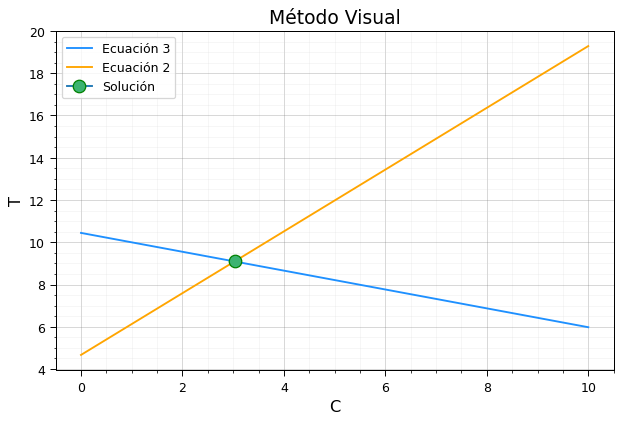

In [3]:
# Definimos valores de X para evaluar
C = np.linspace(start=0, stop=10, num=11)

'''
PASO 1. Estimar T a partir de la Ecuación 3
PASO 2. Estimar T a partir de la Ecuación 2
PASO 3. Método gráfico: ¿dónde se intersectan?
'''

# Definimos la Ecuación 3
def ec3(C):
    return (16 - 8 - C * np.sin(np.deg2rad(20))) / np.cos(np.deg2rad(40))

T3 = ec3(C)

# Definimos la Ecuación 2 (o 4)
def ec2(C):
    return (3 + C * np.cos(np.deg2rad(20))) / np.sin(np.deg2rad(40))

T2 = ec2(C)

# Método Gráfico
hor = 8
ver = 5
fig1 = plt.figure(figsize=(hor, ver), dpi=90)

plt.plot(C, T3, linestyle='-', color='dodgerblue', label='Ecuación 3')
plt.plot(C, T2, linestyle='-', color='orange', label='Ecuación 2')
plt.plot(3.03, 9.09, marker='o', ms='10', markerfacecolor='mediumseagreen', markeredgecolor='green', label='Solución')

formato_grafica(titulo='Método Visual', 
                ejex='C', 
                ejey='T',
                leyenda=True)

### 1.6.1. Método de Matrices

Como vimos en la clase anterior (`C9_sistemaecuaciones.ipynb`), tenemos $m$ ecuaciones lineales con $n$ incógnitas, donde las incógnitas son $x_1, x_2, ..., x_n$.

$$
\begin{cases}
  a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n = b_1 & (1) \\ 
  \\
  a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n = b_2 & (2) \\
  \\
  \hspace{2.5cm} \vdots \\
  \\
   a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n = b_m & (m) \\
\end{cases} 
$$

Ahora, si separamos los coeficientes $a_{nm}$, es posible reescribir el sistema de ecuaciones en forma matricial, es decir:

$$
{\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn} \\
\end{bmatrix}}
{\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n \\
\end{bmatrix}} =
{\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_n \\
\end{bmatrix}}
$$

Representando cada matrix con una letra, se tiene:

$$
Ax = b
$$

Donde:
- $A$ es una matriz de $m$ filas por $n$ columnas y se conoce como **matriz de coeficientes**.
- $x$ es un vector columna de longitud $n$ (es decir, 1 columna y $n$ filas) y se conoce como **vector de incógnitas**.
- $b$ es un vector columna de longitud $m$ (es decir, 1 columna y $m$ filas) y se conoce como **vector de términos independientes**.

La solución es entonces:

$$
\boxed{x = A^{-1} b}
$$

El término $A^{-1}$ es la **inversa de la matrix $A$**.

#### 1.6.1.1. Empleando `numpy.linalg.inv` y `numpy.dots`

$$
\begin{cases}
  \sum F_x = 0 \: \rightarrow \: 8 + T \cos(40) + C \sin(20) - 16 = 0 & (1)\\ 
  \\
  \sum F_y = 0 \: \rightarrow \: T \sin(40) - C \cos(20) - 3 = 0 & (2)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{C = 3.03}
$$

$$
\boxed{T = 9.09}
$$

In [4]:
# PASO 1. Matriz de coeficientes (2 filas y 2 columnas)
A = np.array( [ [np.cos(np.deg2rad(40)), np.sin(np.deg2rad(20))],
                [np.sin(np.deg2rad(40)), -np.cos(np.deg2rad(20))] ] )

A

array([[ 0.76604444,  0.34202014],
       [ 0.64278761, -0.93969262]])

In [5]:
# PASO 2. Vector de términos independientes (2 filas y 1 columna)
b = np.array( [8, 3] )
b

array([8, 3])

In [6]:
# PASO 3. Inversa de matriz de coeficientes -> A
invA = np.linalg.inv(A)
invA

array([[ 1.        ,  0.36397023],
       [ 0.68404029, -0.81520747]])

In [7]:
# PASO 4. Vector de incógnitas (2 filas y 1 columna) -> invA · b
x = np.dot(invA, b)
x

array([9.0919107 , 3.02669989])

#### 1.6.1.2. Empleando `numpy.linalg.solve`

$$
\begin{cases}
  \sum F_x = 0 \: \rightarrow \: 8 + T \cos(40) + C \sin(20) - 16 = 0 & (1)\\ 
  \\
  \sum F_y = 0 \: \rightarrow \: T \sin(40) - C \cos(20) - 3 = 0 & (2)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{C = 3.03}
$$

$$
\boxed{T = 9.09}
$$

In [8]:
# PASO 1. Matriz de coeficientes (2 filas y 2 columnas)
A = np.array( [ [np.cos(np.deg2rad(40)), np.sin(np.deg2rad(20))],
                [np.sin(np.deg2rad(40)), -np.cos(np.deg2rad(20))] ] )

A

array([[ 0.76604444,  0.34202014],
       [ 0.64278761, -0.93969262]])

In [9]:
# PASO 2. Vector de términos independientes (2 filas y 1 columna)
b = np.array( [8, 3] )
b

array([8, 3])

In [10]:
# PASO 3. Vector de incógnitas (2 filas y 1 columna) -> invA · b
x = np.linalg.solve(A, b)
x

array([9.0919107 , 3.02669989])

#### 1.6.1.3 Empleando `sympy.rref()`

$$
\begin{cases}
  \sum F_x = 0 \: \rightarrow \: 8 + T \cos(40) + C \sin(20) - 16 = 0 & (1)\\ 
  \\
  \sum F_y = 0 \: \rightarrow \: T \sin(40) - C \cos(20) - 3 = 0 & (2)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{C = 3.03}
$$

$$
\boxed{T = 9.09}
$$

In [11]:
# PASO 1. Matriz de coeficientes y vector de términos independientes
A_aumentada = sympy.Matrix( [ [np.cos(np.deg2rad(40)), np.sin(np.deg2rad(20)), 8],
                              [np.sin(np.deg2rad(40)), -np.cos(np.deg2rad(20)), 3] ] )

A_aumentada

Matrix([
[0.766044443118978,  0.342020143325669, 8],
[0.642787609686539, -0.939692620785908, 3]])

In [12]:
# PASO 2. Solución mediante matriz escalonada
x = A_aumentada.rref()[0]
x

Matrix([
[1, 0, 9.09191070279861],
[0, 1, 3.02669988592299]])

### 1.6.2. Librería `scipy.optimize.fsolve`

Recordemos que la librería `scipy.optimize.fsolve` la utilizamos para determinar las raíces de una función.

Esta librería requiere dos parámetros de entrada:
1. Función (en este caso el sistema de ecuaciones).
2. Una primera estimación.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `scipy.optimize.fsolve` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).
</div>

$$
\begin{cases}
  \sum F_x = 0 \: \rightarrow \: 8 + T \cos(40) + C \sin(20) - 16 = 0 & (1)\\ 
  \\
  \sum F_y = 0 \: \rightarrow \: T \sin(40) - C \cos(20) - 3 = 0 & (2)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{C = 3.03}
$$

$$
\boxed{T = 9.09}
$$

In [13]:
# PASO 1. Definir la función
def f(z):
    ## Definimos las incógnitas
    T = z[0]
    C = z[1]
    
    ## Creamos una lista vacía para alojar las funciones 
    F = [8 + T * np.cos(np.deg2rad(40)) + C * np.sin(np.deg2rad(20)) - 16,
         T * np.sin(np.deg2rad(40)) - C * np.cos(np.deg2rad(20)) - 3]
    
    return F

In [14]:
# PASO 2. Indicar valor cercano a la raíz
estimacion = [1, 1]
estimacion

[1, 1]

In [15]:
# PASO 3. Estimar raíz
x = optimize.fsolve(func=f,
                    x0=estimacion)

x

array([9.0919107 , 3.02669989])

### 1.6.3. Librería `sympy.solve`

La forma en como podemos expresar las ecuaciones en código de forma 'similar a cuando la escribimos en una hoja' es de forma **simbólica**.

La librería de Python que permite definir variables en forma simbólica es `sympy`. Esto se realiza mediante la función `sympy.Symbol`.

A partir de las variables simbólicas y, empleando la función `sympy.solve`, podemos encontrar la solución del sistema de ecuaciones lineales.

El flujo de trabajo es:

1. Definiremos las variables simbólicas.
2. Definiremos el sistema de ecuaciones.
3. Encontraremos las soluciones mediante la función `sympy.solve`.

La ventaja que tenemos sobre las demás funciones es que solo basta con escribir la función en forma simbólica para poder estimar las raíces.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `sympy.solve` dando clic [aquí](https://docs.sympy.org/latest/modules/solvers/solvers.html).
</div>

$$
\begin{cases}
  \sum F_x = 0 \: \rightarrow \: 8 + T \cos(40) + C \sin(20) - 16 = 0 & (1)\\ 
  \\
  \sum F_y = 0 \: \rightarrow \: T \sin(40) - C \cos(20) - 3 = 0 & (2)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{C = 3.03}
$$

$$
\boxed{T = 9.09}
$$

In [16]:
# PASO 1. Definir las variables simbólicas
T = sympy.Symbol('T')
T

T

In [17]:
C = sympy.Symbol('C')
C

C

In [18]:
# PASO 2. Definir las funciones simbólicas
ec1 = sympy.Eq(8 + T * np.cos(np.deg2rad(40)) + C * np.sin(np.deg2rad(20)) - 16, 0) # La derecha de la igualdad va después de la coma
ec1

Eq(0.342020143325669*C + 0.766044443118978*T - 8, 0)

In [19]:
ec2 = sympy.Eq(T * np.sin(np.deg2rad(40)) - C * np.cos(np.deg2rad(20)) - 3, 0)
ec2

Eq(-0.939692620785908*C + 0.642787609686539*T - 3, 0)

In [20]:
# PASO 3. Solucionar el sistema de ecuaciones
sol = sympy.solve([ec1, ec2], # Lista de ecuaciones
                  [T, C]) # Lista de símbolos
sol

{T: 9.09191070279861, C: 3.02669988592298}

## 1.7. Ejemplo 2

Debemos determinar la magnitud de la tensión $T$ en el cable de soporte y la magnitud de la fuerza sobre el pasador en $A$ para la grúa giratoria que se muestra. La viga $AB$ es una viga tipo I estándar de 0.5 m con peso de 4.66 kN.

<img src='./img/example2.png' width='550' height='550'/>

Del diagrama de cuerpo libre vemos **tres incógnidas**: $A_x$, $A_y$ y $T$. Por tanto, debemos definir **tres ecuaciones**.

Analíticamente, empleando el método de sustitución, tenemos que:

$$
\begin{cases}
  \sum M_A = 0 \: \rightarrow \: 0.25 \cdot T \cos(25) + (5-0.12) \cdot T \sin(25) - 10 \cdot (5 - 1.5 - 0.12) - 4.66 \cdot (2.5 - 0.12) = 0 & (1)\\ 
  \\
  \sum F_x = 0 \: \rightarrow \: A_x - T \cdot \cos(25) = 0 & (2)\\
  \\
  \sum F_y = 0 \: \rightarrow \: A_y + T \cdot \sin(25) - 4.66 - 10 = 0 & (3)\\
\end{cases} 
$$

En este caso particular, notemos que, aunque tenemos tres ecuaciones y tres incógnitas, cada ecuación solo contiene una incógnita, es decir, una incógnita por cada una de las ecuaciones. Luego, al determinar las incógnitas se obtiene que:

$$
\boxed{T = 19.61}
$$

$$
\boxed{A_x = 17.77}
$$

$$
\boxed{A_y = 6.37}
$$

### 1.7.1. Método de Matrices

#### 1.7.1.1. Empleando `numpy.linalg.inv` y `numpy.dots`

<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con las librerías `numpy.linalg.inv` y `numpy.dots` el siguiente sistema de ecuaciones lineales.

$$
\begin{cases}
  \sum M_A = 0 \: \rightarrow \: 0.25 \cdot T \cos(25) + (5-0.12) \cdot T \sin(25) - 10 \cdot (5 - 1.5 - 0.12) - 4.66 \cdot (2.5 - 0.12) = 0 & (1)\\ 
  \\
  \sum F_x = 0 \: \rightarrow \: A_x - T \cdot \cos(25) = 0 & (2)\\
  \\
  \sum F_y = 0 \: \rightarrow \: A_y + T \cdot \sin(25) - 4.66 - 10 = 0 & (3)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{T = 19.61}
$$

$$
\boxed{A_x = 17.77}
$$

$$
\boxed{A_y = 6.37}
$$

</div>

In [21]:
# PASO 1. Matriz de coeficientes (3 filas y 3 columnas)
A = np.array( [ [0.25*np.cos(np.deg2rad(25)) + (5-0.12)*np.sin(np.deg2rad(25)), 0, 0],
                [-np.cos(np.deg2rad(25)), 1, 0],
                [np.sin(np.deg2rad(25)), 0, 1]] )

A

array([[ 2.28895406,  0.        ,  0.        ],
       [-0.90630779,  1.        ,  0.        ],
       [ 0.42261826,  0.        ,  1.        ]])

In [22]:
# PASO 2. Vector de términos independientes (3 filas y 1 columna)
b = np.array( [-(-10*(5-1.5-0.12) - 4.66*(2.5-0.12)),
               0,
               -(-4.66-10)] )
b

array([44.8908,  0.    , 14.66  ])

In [23]:
# PASO 3. Inversa de matriz de coeficientes -> A
invA = np.linalg.inv(A)
invA

array([[ 0.43688076,  0.        ,  0.        ],
       [ 0.39594844,  1.        ,  0.        ],
       [-0.18463379,  0.        ,  1.        ]])

In [24]:
# PASO 4. Vector de incógnitas (3 filas y 1 columna) -> invA · b
x = np.dot(invA, b)
x

array([19.611927  , 17.77444215,  6.3716415 ])

#### 1.7.1.2. Empleando `numpy.linalg.solve`

<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con la librería `numpy.linalg.solve` el siguiente sistema de ecuaciones lineales.

$$
\begin{cases}
  \sum M_A = 0 \: \rightarrow \: 0.25 \cdot T \cos(25) + (5-0.12) \cdot T \sin(25) - 10 \cdot (5 - 1.5 - 0.12) - 4.66 \cdot (2.5 - 0.12) = 0 & (1)\\ 
  \\
  \sum F_x = 0 \: \rightarrow \: A_x - T \cdot \cos(25) = 0 & (2)\\
  \\
  \sum F_y = 0 \: \rightarrow \: A_y + T \cdot \sin(25) - 4.66 - 10 = 0 & (3)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{T = 19.61}
$$

$$
\boxed{A_x = 17.77}
$$

$$
\boxed{A_y = 6.37}
$$

</div>

In [25]:
# PASO 1. Matriz de coeficientes
A = np.array( [ [0.25*np.cos(np.deg2rad(25)) + (5-0.12)*np.sin(np.deg2rad(25)), 0, 0],
                [-np.cos(np.deg2rad(25)), 1, 0],
                [np.sin(np.deg2rad(25)), 0, 1]] )

# PASO 2. Vector de términos independientes
b = np.array( [-(-10*(5-1.5-0.12) - 4.66*(2.5-0.12)),
               0,
               -(-4.66-10)] )

# PASO 3. Vector de incógnitas
x = np.linalg.solve(A, b)
x

array([19.611927  , 17.77444215,  6.3716415 ])

#### 1.7.1.3 Empleando `sympy.rref()`

<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con la librería `sympy.rref()` el siguiente sistema de ecuaciones lineales.

$$
\begin{cases}
  \sum M_A = 0 \: \rightarrow \: 0.25 \cdot T \cos(25) + (5-0.12) \cdot T \sin(25) - 10 \cdot (5 - 1.5 - 0.12) - 4.66 \cdot (2.5 - 0.12) = 0 & (1)\\ 
  \\
  \sum F_x = 0 \: \rightarrow \: A_x - T \cdot \cos(25) = 0 & (2)\\
  \\
  \sum F_y = 0 \: \rightarrow \: A_y + T \cdot \sin(25) - 4.66 - 10 = 0 & (3)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{T = 19.61}
$$

$$
\boxed{A_x = 17.77}
$$

$$
\boxed{A_y = 6.37}
$$

</div>

In [26]:
# PASO 1. Matriz de coeficientes y vector de términos independientes
A_aumentada = sympy.Matrix( [ [0.25*np.cos(np.deg2rad(25)) + (5-0.12)*np.sin(np.deg2rad(25)), 0, 0, -(-10*(5-1.5-0.12) - 4.66*(2.5-0.12))],
                              [-np.cos(np.deg2rad(25)), 1, 0, 0],
                              [np.sin(np.deg2rad(25)), 0, 1, -(-4.66-10)]] )

# PASO 2. Solución mediante matriz escalonada
x = A_aumentada.rref()[0]
x

Matrix([
[1, 0, 0, 19.6119269953796],
[0, 1, 0, 17.7744421547068],
[0, 0, 1, 6.37164150382719]])

### 1.7.2. Librería `scipy.optimize.fsolve`

<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con la librería `scipy.optimize.fsolve` el siguiente sistema de ecuaciones lineales.

$$
\begin{cases}
  \sum M_A = 0 \: \rightarrow \: 0.25 \cdot T \cos(25) + (5-0.12) \cdot T \sin(25) - 10 \cdot (5 - 1.5 - 0.12) - 4.66 \cdot (2.5 - 0.12) = 0 & (1)\\ 
  \\
  \sum F_x = 0 \: \rightarrow \: A_x - T \cdot \cos(25) = 0 & (2)\\
  \\
  \sum F_y = 0 \: \rightarrow \: A_y + T \cdot \sin(25) - 4.66 - 10 = 0 & (3)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{T = 19.61}
$$

$$
\boxed{A_x = 17.77}
$$

$$
\boxed{A_y = 6.37}
$$

</div>

In [27]:
# PASO 1. Definir la función
def f(z):
    ## Definimos las incógnitas
    T = z[0]
    Ax = z[1]
    Ay = z[2]

    ## Creamos una lista vacía para alojar las funciones
    F = [0.25*T*np.cos(np.deg2rad(25)) + (5-0.12)*T*np.sin(np.deg2rad(25)) - 10*(5-1.5-0.12) - 4.66*(2.5-0.12),
         Ax - T*np.cos(np.deg2rad(25)),
         Ay + T*np.sin(np.deg2rad(25)) - 4.66 - 10]

    return F

In [28]:
# PASO 2. Indicar valor cercano a la raíz
estimacion = [1, 1, 1]
estimacion

[1, 1, 1]

In [29]:
# PASO 3. Estimar raíz
x = optimize.fsolve(func=f,
                    x0=estimacion)

x

array([19.611927  , 17.77444215,  6.3716415 ])

### 1.7.3. Librería `sympy.solve`


<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con la librería `sympy.solve` el siguiente sistema de ecuaciones lineales.

$$
\begin{cases}
  \sum M_A = 0 \: \rightarrow \: 0.25 \cdot T \cos(25) + (5-0.12) \cdot T \sin(25) - 10 \cdot (5 - 1.5 - 0.12) - 4.66 \cdot (2.5 - 0.12) = 0 & (1)\\ 
  \\
  \sum F_x = 0 \: \rightarrow \: A_x - T \cdot \cos(25) = 0 & (2)\\
  \\
  \sum F_y = 0 \: \rightarrow \: A_y + T \cdot \sin(25) - 4.66 - 10 = 0 & (3)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{T = 19.61}
$$

$$
\boxed{A_x = 17.77}
$$

$$
\boxed{A_y = 6.37}
$$

</div>

In [30]:
# PASO 1. Definir las variables simbólicas
T = sympy.Symbol('T')
Ax = sympy.Symbol('Ax')
Ay = sympy.Symbol('Ay')

In [31]:
# PASO 2. Definir las funciones simbólicas
ec1 = sympy.Eq(0.25*T*np.cos(np.deg2rad(25)) + (5-0.12)*T*np.sin(np.deg2rad(25)) - 10*(5-1.5-0.12) - 4.66*(2.5-0.12), 0) # La derecha de la igualdad va después de la coma
ec2 = sympy.Eq(Ax - T*np.cos(np.deg2rad(25)), 0) # La derecha de la igualdad va después de la coma
ec3 = sympy.Eq(Ay + T*np.sin(np.deg2rad(25)) - 4.66 - 10, 0) # La derecha de la igualdad va después de la coma

In [32]:
# PASO 3. Solucionar el sistema de ecuaciones
sol = sympy.solve([ec1, ec2, ec3], # Lista de ecuaciones
                  [T, Ax, Ay]) # Lista de símbolos
sol

{T: 19.6119269953795, Ax: 17.7744421547068, Ay: 6.37164150382722}

## 1.8. Estructuras

Una estructura de ingeniería es cualquier sistema conectado de elementos construidos para soportar o transferir fuerzas y para **soportar con seguridad** las cargas que se le aplican. Algunos ejemplos son cerchas y máquinas.

Para determinar las fuerzas internas de una estructura de ingeniería, debemos analizar por partes la estructura y realizar diagramas de cuerpo libre separados individualmente o por combinaciones de partes.

Las estructuras requieren una aplicación cuidadosa de la tercera ley de Newton, que establece que cada acción va acompañada de una reacción igual y opuesta.

Para esta clase nos centraremos únicamente en **cerchas**.

Un armazón compuesto por miembros unidos en sus extremos para formar una estructura rígida se llama **cercha**. Algunos ejemplos son: puentes, soportes de techos, torres de perforación.

<img src='./img/cercha.png' width='550' height='550'/>

El método de resolución de las ecuaciones de equilibrio en cerchas se conoce como **Método de Juntas** y es el siguiente:
> Satisfacer las condiciones de equilibrio de las fuerzas que actúan sobre el pin de conexión de cada elemento.

<img src='./img/dcl_cercha.png' width='400' height='400'/>

### 1.8.1 Ejemplo 3 (Librería `sympy.solve`)

Debemos determinar la fuerza en cada miembro de la cercha en voladizo por el método de juntas.

<img src='./img/example3.png' width='550' height='550'/>

Del diagrama de cuerpo libre vemos **diez incógnidas** y, por tanto, debemos definir **diez ecuaciones**.

Analíticamente, empleando el método de sustitución, tenemos que:

$$
\begin{cases}
  \sum M_E = 0 \: \rightarrow \: 5 T - 20(5) - 30(10) = 0 & (1)\\ 
  \\
  \sum F_x = 0 \: \rightarrow \: T \cdot \cos(30) - E_x = 0 & (2)\\
  \\
  \sum F_y = 0 \: \rightarrow \: T \cdot \sin(30) + E_y - 20 - 30 = 0 & (3)\\
  \\
  \sum A_y = 0 \: \rightarrow \: AB \cdot \sin(60) - 30 = 0 & (4)\\
  \\
  \sum A_x = 0 \: \rightarrow \: AC - AB \cdot \cos(60) = 0 & (5)\\
  \\
  \sum B_y = 0 \: \rightarrow \: BC \cdot \cos(30) - AB \cdot \cos(30) = 0 & (6)\\
  \\
  \sum B_x = 0 \: \rightarrow \: BD - BC \cdot \sin(30) - AB \cdot \sin(30) = 0 & (7)\\
  \\
  \sum C_y = 0 \: \rightarrow \: CD \cdot \sin(60) - BC \cdot \sin(60) - 20 = 0 & (8)\\
  \\
  \sum C_x = 0 \: \rightarrow \: CE - AC - BC \cdot \cos(60) - CD \cdot \cos(60) = 0 & (9)\\
  \\
  \sum E_y = 0 \: \rightarrow \: DE \cdot \sin(60) = 10 & (10)\\
\end{cases} 
$$

Los siguientes resultados son obtenidos al emplear el método de sustitución:

$$
\boxed{T = 80}
$$

$$
\boxed{E_x = 69.3}
$$

$$
\boxed{E_y = 10}
$$

$$
\boxed{AB = 34.6}
$$

$$
\boxed{AC = 17.32}
$$

$$
\boxed{BC = 34.6}
$$

$$
\boxed{BD = 34.6}
$$

$$
\boxed{CD = 57.7}
$$

$$
\boxed{CE = 63.5}
$$

$$
\boxed{DE = 11.55}
$$

In [33]:
# PASO 1. Definir las variables simbólicas
T, Ex, Ey, AB, AC, BC, BD, CD, CE, DE = sympy.symbols('T, Ex, Ey, AB, AC, BC, BD, CD, CE, DE')

Notemos que en este caso utilizamos `sympy.symbols` porque estamos definiendo más de una variable en una única línea de código, en lugar de `sympy.Symbol` en donde definimos un único símbolo a la vez (sería: `T = sympy.Symbol('T')`, `Ex = sympy.Symbol('Ex')`, ..., `DE = sympy.Symbol('DE')`).

In [34]:
# PASO 2. Definir las funciones simbólicas
ec1 = sympy.Eq( 5*T - 20*5 - 30*10, 0 )

ec2 = sympy.Eq( T * np.cos(np.deg2rad(30)) - Ex, 0 )

ec3 = sympy.Eq( T * np.sin(np.deg2rad(30)) + Ey - 20 - 30, 0 ) 

ec4 = sympy.Eq( AB * np.sin(np.deg2rad(60)) - 30, 0 )

ec5 = sympy.Eq( AC - AB * np.cos(np.deg2rad(60)), 0 )

ec6 = sympy.Eq( BC * np.cos(np.deg2rad(30)) - AB * np.cos(np.deg2rad(30)), 0 )

ec7 = sympy.Eq( BD - BC * np.sin(np.deg2rad(30)) - AB * np.sin(np.deg2rad(30)), 0 )

ec8 = sympy.Eq( CD * np.sin(np.deg2rad(60)) - BC * np.sin(np.deg2rad(60)) - 20, 0 )

ec9 = sympy.Eq( CE - AC - BC * np.cos(np.deg2rad(60)) - CD * np.cos(np.deg2rad(60)), 0 )

ec10 = sympy.Eq( DE * np.sin(np.deg2rad(60)) - 10, 0 )

In [35]:
# PASO 3. Solucionar el sistema de ecuaciones
sol = sympy.solve([ec1, ec2, ec3, ec4, ec5, ec6, ec7, ec8, ec9, ec10], # Lista de ecuaciones
                  [T, Ex, Ey, AB, AC, BC, BD, CD, CE, DE]) # Lista de símbolos

sol

{T: 80.0000000000000,
 Ex: 69.2820323027551,
 Ey: 10.0000000000000,
 AB: 34.6410161513775,
 AC: 17.3205080756888,
 BC: 34.6410161513775,
 BD: 34.6410161513775,
 CD: 57.7350269189626,
 CE: 63.5085296108588,
 DE: 11.5470053837925}